In [1]:
import importlib
experiment_1 = importlib.import_module("experiment 1")
importlib.reload(experiment_1)
import importlib
generate_dataset = importlib.import_module("generate_dataset")
importlib.reload(generate_dataset)



import importlib

experiment_2 = importlib.import_module("experiment_2")
importlib.reload(experiment_2)

<module 'experiment_2' from 'f:\\Jelena\\FAKULTET\\Student\\DOKTORAT\\projekat 2rad\\oop\\experiment_2.py'>

In [2]:
from generate_dataset import *
from neural_net import *
from plotting import *
from postprocessing_dataset import *
from predicting import *
from preprocessing_dataset import *
from testing import *
import json
np.set_printoptions(precision=2)

In [ ]:
side, dataa = generate_dataset.generate_raw_dataset_G(5000,600)
#

In [ ]:
experiment_2.export_dataset(dataa,"data_ff.json")

In [ ]:
experiment_2.import_dataset("data_D.json")

In [ ]:
data = experiment_2.import_dataset("data_C.json")

## Data diversity

In [ ]:
data = experiment_2.import_dataset("data_C.json")
data_train,data_test = experiment_1.make_train_test(data, 5000, 0)
X_train = experiment_1.generate_2D_features_from_raw_dataset(data_train,600,2)
dataset_prec_recall_per_type = experiment_1.measure_prec_recall_between_datasets(X_train[:,:2,:],X_train[:,:2,:])
dataset_f1_per_type = experiment_1.measure_f1_between_datasets(dataset_prec_recall_per_type)

In [ ]:
X_train.shape

In [ ]:
### diversity za vise datasestova, pustis i ne razmisljas
niz = []
niz_fajlova = ["data_B.json"]
num_objects = 5
for fajl in niz_fajlova:
    data = experiment_1.import_dataset(fajl)
    data_train,data_test = experiment_1.make_train_test(data, 5000, 0)
    ### kad tesstiras za A i B po
    #experiment_1  za ostale experiment_2.
    X_train = experiment_1.generate_2D_features_from_raw_dataset(data_train,600,num_objects)
    dataset_prec_recall_per_type = experiment_1.measure_prec_recall_between_datasets(X_train[:,:num_objects,:],X_train[:,:num_objects,:])
    dataset_f1_per_type = experiment_1.measure_f1_between_datasets(dataset_prec_recall_per_type)
    a = (dataset_f1_per_type[:,:,:]).mean(axis = 1)
    ld = experiment_1.leave_diagonal(a)
    mean,sigma = experiment_1.plot_pdf_dataset(ld)
    niz.append(experiment_1.plot_pdf_dataset(ld))
    
np.savetxt('mean_std_B.txt', np.array(niz)*100, fmt='%.2f')

In [ ]:
#np.savetxt('mean_std_D_G.txt', np.array(niz)*100, fmt='%.2f')
sigma


In [ ]:
a = (dataset_f1_per_type[:,:,:]).mean(axis = 1)
ld = experiment_1.leave_diagonal(a)
mean,sigma = experiment_1.plot_pdf_dataset(ld)
niz.append(experiment_1.plot_pdf_dataset(ld))

In [ ]:
experiment_1.plot_pdf_dataset(ld)

In [ ]:
niz.append(experiment_1.plot_pdf_dataset(ld))

In [ ]:
np.savetxt('myfile.txt', np.array(niz), fmt='%.2f')

## Treniranje  i testiranje

In [ ]:
def experiment_C_G(data_train,data_test, train_set_sizes,testset_size,object_types_prediction,max_obj_types):
    length_feature = 1
    def reset_weights(model):
        import keras.backend as K
        session = K.get_session()
        for layer in model.layers: 
            if hasattr(layer, 'kernel_initializer'): 
                layer.kernel.initializer.run(session=session)
            if hasattr(layer, 'bias_initializer'):
                layer.bias.initializer.run(session=session)  
    precissions_types_train, recall_types_train,precissions_types_test, recall_types_test = [],[],[],[]
    #object_types_prediction  = list(range(0,data_train["objects"].shape[1]))
    train_raw_dataset = experiment_2.make_train(data_train, train_set_sizes[0])
    print(object_types_prediction)
    X_test,Y_test = experiment_1.data_preprocessing(data_test,max_obj_types,length_feature,object_types_prediction)
    print(X_test.shape)
#     X_test = X_test[:,[0,1,4],:]
    Xtrains = []
    Ytrains = []
    Xtest = []
    Ytest = []
    preds_train = []
    preds_test = []
    for train_size_id in range(len(train_set_sizes)):
        if train_size_id > 0:        
            train_raw_dataset = experiment_2.make_train(data_train, train_set_sizes[train_size_id])
            reset_weights(model)

        X_train,Y_train = experiment_1.data_preprocessing(train_raw_dataset,max_obj_types,length_feature,object_types_prediction)
        print("shape")
        print(X_train.shape)
#         X_train = X_train[:,[0,1,4],:] 
        model = run_nn((X_train, Y_train), (X_test, Y_test),5 )
        pred_train = experiment_1.model_predict(model, X_train,length_feature,2)
        pred_test = experiment_1.model_predict(model, X_test,length_feature,2)
        
        pred_train = experiment_1.arrange_object(pred_train, Y_train)
        pred_test = experiment_1.arrange_object(pred_test, Y_test)

        
        precision_train_types, recall_train_types = precisions_recalls_types_ex(pred_train,Y_train,object_types_prediction)
        precision_test_types, recall_test_types = precisions_recalls_types_ex(pred_test,Y_test,object_types_prediction)
        precissions_types_train.append(precision_train_types)
        recall_types_train.append(recall_train_types)
        precissions_types_test.append(precision_test_types)
        recall_types_test.append(recall_test_types)
        Xtrains.append(X_train)
        Ytrains.append(Y_train)
        Xtest.append(X_test)
        Ytest.append(Y_test)
        preds_train.append(pred_train)
        preds_test.append(pred_test)
        
    return precissions_types_train,recall_types_train,precissions_types_test,recall_types_test,Xtrains,Ytrains,Xtest,Ytest,preds_test,preds_train


In [ ]:
# max_object_types = 2
# object_types_prediction  = list(range(0,max_object_types))
# object_types_prediction = object_types_prediction[1:]
# max_object_types = 2
# data = experiment_2.import_dataset("data_D.json")
# data_train,data_test = experiment_2.make_train_test(data, 4000, 1000)
# pr_tr,r_tr,p_ts,r_ts,x_tr,ytr,xts,yts,pred_test,pred_train = experiment_C_G(data_train,data_test, [100, 200,],1000,object_types_prediction,max_object_types)

In [ ]:
max_object_types = 2
object_types_prediction  = list(range(0,max_object_types))
object_types_prediction = object_types_prediction[1:]
data = experiment_2.import_dataset("data_f.json")

precissions_types_train_iterations = []# broj iteracija, broj razlicitih velicina trening skupa, broj tipova,broj primera
recall_types_train_iterations = []
precissions_types_test_iterations = []
recall_types_test_iterations = []

X_types_train_iterations = []# broj iteracija, broj razlicitih velicina trening skupa, broj tipova,broj primera
Y_train_iterations = []
X_types_test_iterations = []
Y_types_test_iterations = []
isti = []
preds_train = []
preds_test = []
for i in range(0,5):
    #data = import_dataset("data.json")
    data_train,data_test = experiment_2.make_train_test(data, 4000, 1000)

    
    precissions_types_train,recall_types_train,precissions_types_test,recall_types_test,a,b,c,d,pred_test,pred_train = experiment_C_G(data_train,data_test, [100, 200, 500, 1000, 4000],1000,object_types_prediction,max_object_types)
    precissions_types_train_iterations.append(precissions_types_train)
    recall_types_train_iterations.append(recall_types_train)
    precissions_types_test_iterations.append(precissions_types_test)
    recall_types_test_iterations.append(recall_types_test)
    X_types_train_iterations.append(a)
    Y_train_iterations.append(b)
    X_types_test_iterations.append(c)
    Y_types_test_iterations.append(d)
    preds_train.append(pred_train)
    preds_test.append(pred_test)
    print("finish")
X_types_test_iterations = np.asarray(X_types_test_iterations)
Y_types_test_iterations = np.asarray(Y_types_test_iterations)

recall_types_test_iterations = np.asarray(recall_types_test_iterations)


In [ ]:
X_types_test_iterations.shape

In [ ]:
X_types_test_iterations = np.asarray(X_types_test_iterations)
Y_types_test_iterations = np.asarray(Y_types_test_iterations)

precissions_types_train_iterations = np.asarray(precissions_types_train_iterations)
precissions_types_test_iterations = np.asarray(precissions_types_test_iterations)

recall_types_train_iterations = np.asarray(recall_types_train_iterations)
recall_types_test_iterations = np.asarray(recall_types_test_iterations)

preds_train,preds_test = np.asarray(preds_train),np.asarray(preds_test)

In [ ]:
# results = [precissions_types_train_iterations,recall_types_train_iterations,precissions_types_test_iterations,recall_types_test_iterations,X_types_train_iterations,Y_train_iterations,X_types_test_iterations,Y_types_test_iterations,preds_train,preds_test]
# import pickle
# with open("results_ff", "wb") as fp:   #Pickling
#     pickle.dump(results, fp)


In [60]:
import pickle
file = open('results_f', 'rb')

# dump information to that file
data = pickle.load(file)
precissions_types_train_iterations,recall_types_train_iterations,precissions_types_test_iterations,recall_types_test_iterations,X_types_train_iterations,Y_train_iterations,X_types_test_iterations,Y_types_test_iterations,preds_train,preds_test = data

In [ ]:
f1 = experiment_1.f1_obj(precissions_types_test_iterations,recall_types_test_iterations)
f1 = f1[:,:,0,:]

In [ ]:
experiment_1.plot_f1_by_size(precissions_types_train_iterations,recall_types_train_iterations,'r')
experiment_1.plot_f1_by_size(precissions_types_test_iterations,recall_types_test_iterations,'b')
plt.legend(["train","test"])
plt.savefig("train_test_size")

### Correct side

Sta je predvide na kojoj strani da se nalazi o2 u odnosu na o1

In [61]:

left_pred,right_pred = experiment_2.to_the_left_to_o1(X_types_test_iterations[:,:,:,1,:],preds_test)

In [62]:
left_test,right_test = experiment_2.to_the_left_to_o1(X_types_test_iterations[:,:,:,1,:],Y_types_test_iterations)

In [63]:
correct_Side = (left_pred ==left_test)

In [64]:
correct_Side.mean(axis = 2).mean(axis = 0)*100

array([94.  , 97.7 , 99.08, 99.44, 99.66])

In [ ]:

# correct_Side = (correct_Side.mean(axis = 2) * 100).mean(axis = 0)### usrednjavam po pbrou primera, pa po broju iteracija
# # sizes = np.repeat([[100,200,500,1000,4000]],repeats = 5,axis = 0)
# plt.plot(["100","200","500","1000","4000"],correct_Side,"o-b")

# plt.title("correct side percentage")
# plt.savefig("correct side percentage")

### F1 kad treba da predvidi levo i desno

In [ ]:
right_f1 = np.ma.masked_where(left_test,f1).mean(axis = 0).mean(axis =1)

In [ ]:
left_f1 = np.ma.masked_where(right_test,f1).mean(axis = 0).mean(axis =1)

In [ ]:
 #left
np.ma.masked_where(right_pred,f1).mean(axis = 0).mean(axis =1).data *100

In [ ]:
#right
np.ma.masked_where(left_pred,f1).mean(axis = 0).mean(axis =1).data * 100

In [ ]:
np.set_printoptions(precision=2)

In [ ]:
left_f1.data * 100

In [ ]:
right_f1.data *100

In [ ]:
plt.plot(["100","200","500","1000","5000"],left_f1.data,"o-r")
plt.plot(["100","200","500","1000","5000"],right_f1.data,"o-b")
plt.legend(["left","right"])
plt.savefig("left_right")

In [ ]:
X_types_test_iterations[0][0][0][1]

In [ ]:
np.where(preds_test[0][0][227]==1)

In [ ]:
np.where(X_types_test_iterations[0][0][227][1]==1)

In [ ]:
np.where(X_types_test_iterations[0][0][227][0]==1)

In [ ]:
np.where(correct[0][0] == 1)

### Violation

In [ ]:
#kad prelazi granice prostora

In [ ]:
# def violation(pred,X_test):
#     suma = []
#     avg = 0
#     correct = []
#     for i in range(pred.shape[0]):
#         if (pred[i].sum() != 0) :
#             end = np.where(pred[i]==1)[0][-1]
#             length = np.where(X_test[i][0]==1)[0][-1]
#         #         print(end,length)
#             if end > length:
#                 suma.append(end - length)
#             elif end == length:
#                 correct.append(0)
#             else:
#                 suma.append(0)
    
#     return np.asarray(suma),np.asarray(correct)
# # def violation_iteration_size(pred,X_test):
# #     violations = []
# #     for i in range(pred.shape[0]):#iteration
# #         violations.append([violation(pred[i][j],X_test[i][j]) for j in range(0,pred.shape[1])])#size
# #     return np.asarray(violations)

# def violation_iteration_avg(pred,X_test):
#     violations_all = []
#     violations_all_count = []
#     cor_all =[]
#     for i in range(pred.shape[0]):#iteration
#         violations  = []
#         violations_count = []
#         corrects = []
#         for j in range(0,pred.shape[1]):
#             niz,correct = violation(pred[i][j],X_test[i][j])
#             nepreskace = niz == 0

#             a = np.ma.masked_where(nepreskace,niz).mean(axis = 0)
#             print(niz.shape)
#             violations.append(a)
#             violations_count.append((niz!=0).sum()/niz.shape[0]*100)
#             corrects.append(correct.shape[0]/niz.shape[0]*100)
#         violations_all_count.append(violations_count)
#         violations_all.append(violations)
#         cor_all.append(corrects)
#     return np.asarray(violations_all), np.asarray(violations_all_count),np.asarray(cor_all)
# #violations_all vraca prosecno preskakanje po iteraciji za razlicite  velicine tr skupa
# #violations_all_count - vraca koliko preskacu po iteraciji za razlicite velicine tr skupa

In [ ]:
violations,distance,correct = experiment_2.violation_iteration_avg(preds_test,X_types_test_iterations)

In [ ]:
# kad predvidi da treba desno da ga stavi, koliko je dobar kad treba uz ivicu da ga stavi

In [ ]:
#outside
np.ma.masked_where(left_pred,violations>0).mean(2).mean(0).data * 100

In [ ]:
#inside
np.ma.masked_where(left_pred,distance>0).mean(2).mean(0).data * 100

In [ ]:
#marginal
np.ma.masked_where(left_pred,correct).mean(2).mean(0).data * 100

In [ ]:
# violations
np.ma.masked_where(np.logical_or(left_pred, violations<=0),violations).mean(axis = 2).mean(axis=0).data

In [ ]:
# distance
np.ma.masked_where(np.logical_or(left_pred, distance<=0),distance).mean(axis = 2).mean(axis=0).data

In [ ]:
# fig, ax1 = plt.subplots()


# color = 'tab:red'
# ax1.set_xlabel('training set size')
# ax1.set_ylabel('mean violation', color=color)
# lns1 = ax1.plot(["100","200","500","1000","4000"], viol.mean(axis = 0), color=color,label = 'mean violation',marker ='o')
# ax1.tick_params(axis='y', labelcolor=color)
  
# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis


# color = 'tab:blue'
# ax2.set_ylabel('mean violated examples', color=color)  # we already handled the x-label with ax1
# lns2 = ax2.plot(["100","200","500","1000","4000"], viol_count.mean(axis = 0), color=color,label = 'mean violated examples',marker ='o', linestyle = 'dotted')
# ax2.set_ylim([0,100])
# ax2.tick_params(axis='y', labelcolor=color)


# # added these three lines
# lns = lns1+lns2
# labs = [l.get_label() for l in lns]
# ax1.legend(lns, labs, loc=0)

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.savefig("count and mean violation")
# plt.show()

In [ ]:
(Y_types_test_iterations[:,:,:,0] == 1).mean(axis = 2).mean(axis = 1)

#### Distance to the left edge

In [ ]:
experiment_2 = importlib.import_module("experiment_2")
importlib.reload(experiment_2)

In [ ]:
wow =experiment_2.iterations_distance_left_edge(preds_test)

In [ ]:
distance_left_edge = wow

In [ ]:
(right_pred == right).mean(axis = 2).mean(axis = 0)

In [ ]:
np.logical_and(right_pred,wow==0)

In [ ]:
### prosecna udaljenost primera od leve ivice
np.ma.masked_where(np.logical_or(right_pred,wow==0),wow).mean(axis = 0).mean(axis =1).data

In [ ]:
### procenat primera koji su stavljeni bas na levu ivicu
np.ma.masked_where(right_pred,wow==0).mean(axis = 2).mean(axis = 0).data *100

In [ ]:
 # to the right prethodno reenje
# space = experiment_2.avg_iterations_space(preds_test, X_types_test_iterations)
# plt.plot(np.ma.masked_where(left_pred,space).mean(axis = 2).mean(axis = 0),"o-r")
# plt.plot(["100","200","500","1000","5000"],viol.mean(axis = 0),"o-b")
# plt.legend(["space","violation"])

In [ ]:
# x = ["100","200",'500','1000','4000']
# viol_perc = np.ma.masked_where(left_pred,outside).mean(axis = 0)
# cor_perc = np.ma.masked_where(left_pred,marginal).mean(axis = 0)
# insight_perc = [100,100,100,100,100] - viol_perc - cor_perc
# plt.bar(x, cor_perc, color='r')
# plt.bar(x, viol_perc, bottom=cor_perc, color='b')
# plt.bar(x, insight_perc, bottom=cor_perc + viol_perc, color='y')

# plt.xlabel("Teams")
# plt.ylabel("Score")
# plt.legend(["Correct", "Outside", "Insight"])
# plt.title("Scores by Teams in 4 Rounds")
# plt.show()

### OVerlapping and distance

In [65]:
overl,dist = experiment_2.overl_dist_iterations(preds_test, X_types_test_iterations)#dist -1 tamo gde je overlaping>0 i obrnuto

In [3]:
Y_types_test_iterations.shape

(5, 5, 1000, 600)

In [66]:
overl,dist = experiment_2.overl_dist_iterations(preds_test, X_types_test_iterations)#dist -1 tamo gde je overlaping>0 i obrnuto

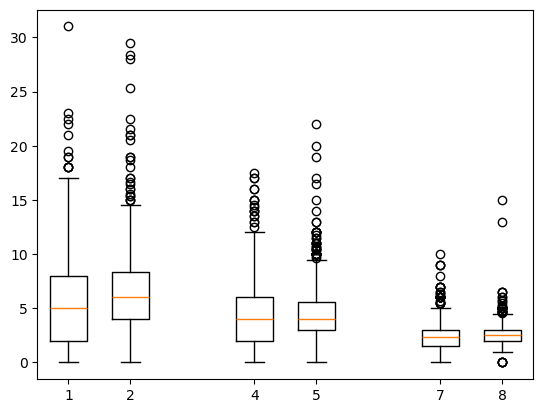

In [79]:
import pickle


# dump information to that file
file = open('results_f', 'rb')

# dump information to that file
data = pickle.load(file)



precissions_types_train_iterations,recall_types_train_iterations,precissions_types_test_iterations,recall_types_test_iterations,X_types_train_iterations,Y_train_iterations,X_types_test_iterations,Y_types_test_iterations,preds_train,preds_test = data

over6,dist6 = experiment_2.overl_dist_iterations(preds_test, X_types_test_iterations)#dist -1 tamo gde je overlaping>0 i obrnuto

left_test,right_test = experiment_2.to_the_left_to_o1(X_types_test_iterations[:,:,:,1,:],Y_types_test_iterations)
left_pred,right_pred = experiment_2.to_the_left_to_o1(X_types_test_iterations[:,:,:,1,:],preds_test)
l6 =np.ma.masked_where(np.logical_or(right_pred,dist6<=0),dist6).mean(axis = 0)


file = open('results_g', 'rb')

# dump information to that file
data = pickle.load(file)

precissions_types_train_iterations,recall_types_train_iterations,precissions_types_test_iterations,recall_types_test_iterations,X_types_train_iterations,Y_train_iterations,X_types_test_iterations,Y_types_test_iterations,preds_train,preds_test = data

over7,dist7 = experiment_2.overl_dist_iterations(preds_test, X_types_test_iterations)#dist -1 tamo gde je overlaping>0 i obrnuto

l7 = np.ma.masked_where(dist7<=0,dist7).mean(axis = 0).data

# for i in range(5):
#     plt.boxplot(l9a[i], positions=[i + 1.1], labels=['X{}'.format(i + 1)])
num_groups = 5
idx = 1
# Width of each box
box_width = 0.35
for i in range(2,5):

    plt.boxplot([l6[i],l7[i]], positions=[idx,idx+1], widths = 0.6)
    idx = idx + 3




plt.savefig("F:/Jelena/FAKULTET/Student/DOKTORAT/radovi/nase/2. rad/applied ai/tabels/imgs/data_e_giss_box.png")



plt.show()
np.savetxt('l6.txt', l6, fmt='%.2f')
np.savetxt('l7.txt', l7, fmt='%.2f')


In [23]:
np.ma.masked_where(dist7<=0,dist7).mean(axis = 2).mean(axis = 0).data

array([70.8 , 74.1 , 73.68, 74.67, 74.77])

In [5]:
l6.shape

(5, 1000)

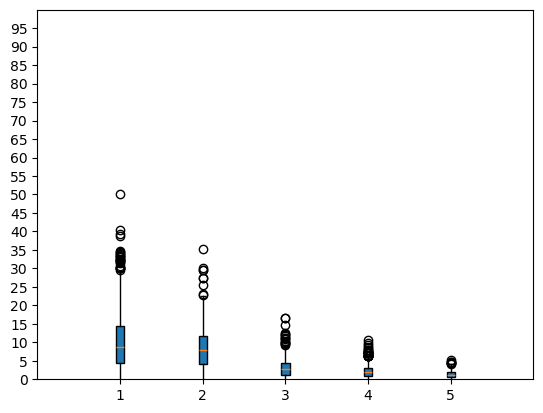

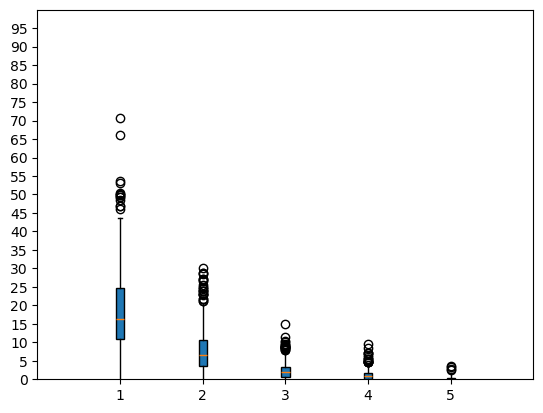

In [147]:
# data = [overl.mean(axis = 0)[x][overl[0,0]>0 & left_pred[0][0]] for x in range(0,5)]
# plt.boxplot(data,widths=0.1, patch_artist=True )
# plt.savefig("F:/Jelena/FAKULTET/Student/DOKTORAT/radovi/nase/2. rad/applied ai/tabels/imgs/data_f_overl_box.png")
# plt.yticks(np.arange(0, ymax, 5)) 
# plt.ylim([ymin,ymax])


# plt.xlim([xmin,xmax])





# data = [dist.mean(axis = 0)[x] for x in range(0,5)]
# plt.boxplot(data,widths=0.1, patch_artist=True)
# plt.savefig("F:/Jelena/FAKULTET/Student/DOKTORAT/radovi/nase/2. rad/applied ai/tabels/imgs/data_g_dist_box.png")
# plt.yticks(np.arange(0, ymax, 5)) 
# plt.ylim([ymin,ymax])


# plt.xlim([xmin,xmax])

# plt.show()

# data = [overl.mean(axis = 0)[x][overl[0,0]>0 & left_pred[0][0]] for x in range(0,5)]
# plt.boxplot(data,widths=0.1, patch_artist=True )
# plt.yticks(np.arange(0, ymax, 5)) 
# plt.ylim([ymin,ymax])


# plt.xlim([xmin,xmax])

# plt.savefig("F:/Jelena/FAKULTET/Student/DOKTORAT/radovi/nase/2. rad/applied ai/tabels/imgs/data_g_overl_box.png")

In [40]:
dist.shape

(5, 5, 1000)

In [116]:
np.ma.masked_where(np.logical_or(left_pred,overl<=0),overl).mean(axis = 0).shape

(5, 1000)

In [67]:
# Intersection left
np.ma.masked_where(np.logical_or(right_pred,overl<=0),overl).mean(axis = 2).mean(axis = 0).data

array([24.72, 15.07,  5.13,  3.29,  1.98])

In [68]:
#Intersection right
np.ma.masked_where(np.logical_or(left_pred,overl<=0),overl).mean(axis = 2).mean(axis = 0).data

array([31.21, 20.63, 13.37,  8.44,  2.79])

In [69]:
#total
np.ma.masked_where(overl<=0,overl).mean(axis = 2).mean(axis = 0).data

array([25.14, 15.57,  5.44,  3.42,  2.03])

In [70]:
#dist left
np.ma.masked_where(np.logical_or(right_pred,dist<=0),dist).mean(axis = 2).mean(axis = 0).data

array([20.05, 16.38,  6.48,  4.85,  2.72])

In [74]:
distleft6 = np.ma.masked_where(np.logical_or(right_pred,dist<=0),dist).mean(axis = 0)
distleft6.mean(axis = 1)

masked_array(data=[20.679685362517098, 16.342475204829668,
                   6.409174491392801, 4.892679127725857,
                   2.6956296296296296],
             mask=[False, False, False, False, False],
       fill_value=1e+20)

In [32]:
np.ma.masked_where(np.logical_or(right_pred,dist<=0),dist).mean(axis = 0).mean(axis = 0)

masked_array(data=[--, 11.933333333333334, 11.266666666666666, 8.4, 7.75,
                   5.6, 22.5, --, 4.333333333333333, 9.15, 7.25, 6.75,
                   14.1, 8.833333333333332, 4.166666666666666, 6.5, 7.0,
                   13.4, 3.5, 9.033333333333333, 8.5, 6.633333333333335,
                   19.866666666666667, 7.25, 7.25, 10.4, 3.0,
                   5.166666666666667, 7.966666666666667, 4.0, 10.6, 5.1,
                   1.5, 14.875, 1.0, 10.766666666666666, 7.2, --, 12.5,
                   10.4, 9.4, 18.2, 6.333333333333333, 11.0,
                   5.444444444444444, 9.8, 3.2, 13.55, 10.3,
                   12.983333333333334, 5.1, 5.0, 7.6, 9.0, 14.0, 12.6,
                   2.0, 9.375, 5.5, 2.75, 4.8, 6.4, 10.433333333333334,
                   16.150000000000002, 6.866666666666667,
                   2.3333333333333335, 7.666666666666667,
                   4.133333333333334, 10.45, 9.7, 11.666666666666666, 8.0,
                   18.4, --, 18.75, 5.72222222

In [71]:
#dist right
np.ma.masked_where(np.logical_or(left_pred,dist<=0),dist).mean(axis = 2).mean(axis = 0).data

array([79.73, 75.72, 75.11, 75.86, 75.56])

In [59]:
#dist total
np.ma.masked_where(dist<=0,dist).mean(axis = 2).mean(axis = 0).data

array([70.8 , 74.1 , 73.68, 74.67, 74.77])

In [22]:
#intersect
(overl>0).mean(axis =2).mean(axis =0) * 100

array([25.7 , 24.32, 16.36, 13.04,  6.34])

In [ ]:
right_pred.mean(axis = 2).mean(axis = 0)

In [ ]:
a = np.ma.masked_where(left_pred,overl>0).mean(axis =2).mean(axis =0) * 100
b = np.ma.masked_where(left_pred,(dist>0)).mean(axis =2).mean(axis =0) * 100
c = np.ma.masked_where(left_pred,(overl==0)).mean(axis =2).mean(axis =0) * 100
print(a.data,b.data,c.data)

In [ ]:
a = np.ma.masked_where(right_pred,overl>0).mean(axis =2).mean(axis =0) * 100
b = np.ma.masked_where(right_pred,(dist>0)).mean(axis =2).mean(axis =0) * 100
c = np.ma.masked_where(right_pred,(overl==0)).mean(axis =2).mean(axis =0) * 100
print(a.data,b.data,c.data)

In [23]:
#dist
(dist>0).mean(axis =2).mean(axis =0) * 100
(dist>0).mean(axis =2).std(axis =0) * 100
### za leve dist i overl
np.ma.masked_where(right_pred,dist>0).mean(axis = 2).mean(axis = 0).data*100
np.ma.masked_where(right_pred,overl>0).mean(axis = 2).mean(axis = 0).data*100


array([73.6 , 74.64, 80.48, 82.6 , 86.62])

In [72]:
# f
# print(np.ma.masked_where(np.logical_or(right_pred,dist<=0),dist).std(axis = 2).mean(axis = 0).data)
# print(np.ma.masked_where(np.logical_or(right_pred,overl<=0),overl).std(axis = 2).mean(axis = 0).data)

# g
#left
print(np.ma.masked_where(np.logical_or(right_pred,dist<=0),dist).std(axis = 2).mean(axis = 0).data)
print(np.ma.masked_where(np.logical_or(right_pred,overl<=0),overl).std(axis = 2).mean(axis = 0).data)

#right
print(np.ma.masked_where(np.logical_or(left_pred,dist<=0),dist).std(axis = 2).mean(axis = 0).data)
print(np.ma.masked_where(np.logical_or(left_pred,overl<=0),overl).std(axis = 2).mean(axis = 0).data)

#all
print(np.ma.masked_where(overl<=0,overl).std(axis = 2).mean(axis = 0).data)
print(np.ma.masked_where(dist<=0,dist).std(axis = 2).mean(axis = 0).data)


[18.94 13.21  5.84  3.58  1.59]
[21.24 13.02  5.75  4.2   2.8 ]
[14.48 10.89  4.8   3.11  1.66]
[24.44 14.11  5.24  3.58  1.47]
[23.22 13.66  5.52  3.81  2.05]
[19.46 12.45  5.4   3.5   1.62]


In [29]:
np.ma.masked_where(right_pred,dist>0).std(axis = 2)

masked_array(
  data=[[0.4703558701335379, 0.49874291723190917, 0.49845820527696044,
         0.4571388360008653, 0.42923275819738443],
        [0.49724866598882334, 0.49385347564323523, 0.46995648310307536,
         0.4968522323622596, 0.42663407731812786],
        [0.4894230738033227, 0.4859326681979645, 0.47978983530563185,
         0.47589136961399553, 0.44179696162785337],
        [0.4957053964019592, 0.4954724916561888, 0.4721269527431277,
         0.4306595080369678, 0.4540624931692628],
        [0.4951292965976695, 0.4903798257008435, 0.49350632331649863,
         0.48280430818293246, 0.44656485603147167]],
  mask=[[False, False, False, False, False],
        [False, False, False, False, False],
        [False, False, False, False, False],
        [False, False, False, False, False],
        [False, False, False, False, False]],
  fill_value=1e+20)

In [ ]:
#tauching
(dist==0).mean(axis =2).mean(axis =0) * 100
np.ma.masked_where(np.logical_or(right_pred,dist<=0),dist==0).mean(axis = 2).mean(axis = 0).data

In [ ]:
(overl==0).mean(axis =2).mean(axis =0) * 100

In [ ]:
(dist[0][0] > 0).sum()

In [ ]:
(overl[0][0] > 0).sum()

In [ ]:
(dist[0][0] == overl[0][0]).sum()

In [ ]:
overl,dist = experiment_2.avg_iterations(preds_test, X_types_test_iterations)

In [ ]:
np.where(preds_test[0][0][55]==1)

In [ ]:
np.where(predde[0][0][55]==1)

In [ ]:
distance

### Zavisnost overlaping od distance od right edge

In [ ]:
niz_l = []
for i in range(0,600,10):
    overl_dist = np.ma.masked_where(np.logical_or(~left_pred,~np.isin(distance,list(range(i,i+10)))),overl>0).mean(axis =2).mean(axis =0).data * 100
    niz_l.append(overl_dist)
niz_arr_l = np.asarray(niz_l)

In [ ]:
# def overl_distance_right_edge(a,b,c):
#     niz_r = []
#     k = 100
#     for i in range(0,600,k):
# #         overl_dist = np.ma.masked_where(np.logical_or(~a,~np.isin(b,list(range(i,i+10)))),c>0).mean(axis =2).mean(axis =0).data * 100
#         overl_dist = np.ma.masked_where(~np.isin(b,list(range(i,i+k))),c>0).mean(axis =2).mean(axis =0).data * 100

#         niz_r.append(overl_dist)
#     return(np.asarray(niz_r))

def overl_distance_right_edgee(a,b,c):
    niz_r = []
    k = 100
    for i in range(0,600,k):
        overl_dist = np.ma.masked_where(np.logical_or(~a,~np.isin(b,list(range(i,i+k)))),c>0).mean(axis =2).mean(axis =0).data * 100
        #overl_dist = np.ma.masked_where(~np.isin(b,list(range(i,i+k))),c>0).mean(axis =2).mean(axis =0).data * 100

        niz_r.append(overl_dist)
    return (np.asarray(niz_r))

In [ ]:
np.ma.masked_where(np.isin(distance,[0,1]),overl>0).mean(axis =2).mean(axis =0).data * 100


In [ ]:
overl,dist = experiment_2.overl_dist_iterations(preds_test, X_types_test_iterations)#dist -1 tamo gde je overlaping>0 i obrnuto

In [ ]:
violations,distance,correct = experiment_2.violation_iteration_avg(preds_test,X_types_test_iterations)

In [ ]:
# niz_arr_l =overl_distance_right_edge(left_pred,absolute,overl)
# niz_arr_r =overl_distance_right_edge(right_pred,absolute,overl)
niz_all = overl_distance_right_edgee(right_pred,distance,dist)
plt.plot(niz_all[:,4])

In [ ]:
niz_all[10:,:]

In [ ]:
absolute = distance - distance_left_edge

## zavisnost corect side i razlika u duzini levog i desnog parceta

In [ ]:
violations,distance_right_edge,correct = experiment_2.violation_iteration_avg(X_types_test_iterations[:,:,:,1,:],X_types_test_iterations)

In [ ]:
left_edge =experiment_2.iterations_distance_left_edge(X_types_test_iterations[:,:,:,1,:])

In [ ]:
absolute = abs(left_edge-distance_right_edge)

In [ ]:
absolute

In [ ]:
def corectside_space_difference(a,b,c):
    niz_r = []
    k = 10
    for i in range(0,600,k):
#         overl_dist = np.ma.masked_where(np.logical_or(~a,~np.isin(b,list(range(i,i+10)))),c>0).mean(axis =2).mean(axis =0).data * 100
        overl_dist = np.ma.masked_where(~np.isin(absolute,list(range(i,i+k))),correct_Side).mean(axis =2).mean(axis =0).data * 100

        niz_r.append(overl_dist)
    return(np.asarray(niz_r))

In [ ]:
vre = corectside_space_difference(0,0,0)

In [ ]:
overl_dist = np.ma.masked_where(~np.isin(absolute,list(range(20,100))),correct_Side).mean(axis =2).mean(axis =0).data * 100


In [ ]:
plt.plot(vre[:,3])

In [ ]:
widthh =0.1
pomeraj = -0.3
plt.bar(pomeraj + widthh + np.arange(4),lika[0],width = widthh)
plt.bar(pomeraj + widthh*2 + np.arange(4),lika[1],width = widthh)
plt.bar(pomeraj + widthh*3 + np.arange(4),lika[2],width = widthh)
plt.bar(pomeraj + widthh*4 + np.arange(4),lika[3],width = widthh)
plt.bar(pomeraj + widthh*5 + np.arange(4),lika[4],width = widthh)
plt.xticks(np.arange(4), ["1","2",'3','4'])
plt.legend( ['100', '200', '500','1000','4000'] )
plt.savefig("space_B.png")

In [ ]:
np.ma.masked_where(distance != 1,overl>0).mean(axis =2).mean(axis =0).data

In [ ]:
predde[0][0][55].sum()

In [ ]:
np.where(X_types_test_iterations[0][0][55][0]==1)

In [ ]:
dist[0][0]

In [ ]:
proba = Y_types_test_iterations[0,0]

In [ ]:
proba.sum(axis = 1)

In [ ]:
cum=np.cumsum(Y_types_test_iterations[0,0],axis = 1)

In [ ]:
cum[0]

In [ ]:
a = np.asarray([[1,2],[3,4]])

In [ ]:
a.shape

In [ ]:
pred = experiment_1.arrange_object(preds_test[0,0],Y_types_test_iterations[0,0])

In [ ]:
predde = []
for i in range(0,2):
    prede1 = []
    for j in range(0,5):
        prede1.append (experiment_1.arrange_object(preds_test[i,j],Y_types_test_iterations[i,j]))
    predde.append(prede1)    

In [ ]:
predde = np.asarray(predde)

In [ ]:
predde[0][0][0]

In [ ]:
for i in range(0,predii.shape[0]):
    predii[i]